# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [151]:
### Ваш код здесь ###
# Ваш код здесь
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [106]:
### Ваш код здесь ###
df = pd.read_csv('5.5 data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [107]:
nums = []
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)
        print(df[col].describe())
        print('-'*5)
        nums.append(col)
        
    

LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
-----
LotArea_M
count     1460.000000
mean       977.044879
std        927.289456
min        120.773900
25%        701.742811
50%        880.581085
75%       1077.814155
max      19996.906235
Name: LotArea_M, dtype: float64
-----
OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
-----
OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
-----
YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [292]:
df.corr(numeric_only=True).head(1)

,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,DateSold,SalePrice,YearsWithoutRemod,HowMuchTimePassedSinceItWasSold,YearSold
LotArea_M,1.0,0.105806,-0.005636,0.014228,0.013788,0.260833,0.263116,0.09636,0.180403,-0.014205,0.263843,-0.005926,0.014205,-0.014261


In [109]:

### Ваш код здесь ###
df_corr = df.corr(numeric_only=True)
feats_to_del = []
for col in df_corr.columns:

    if len(df_corr[df_corr[col] >=1].index) > 1:
        
        for feat in df_corr[df_corr[col] >=1].index:
            
            if feat == col:
                continue
            elif col in feats_to_del:
                continue
            elif '_M' in feat:
                continue
            else:
                feats_to_del.append(feat)
    
    
df = df.drop(feats_to_del, axis=1)



In [110]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,GasA,Ex,Y,153.011241,3,TA,42.735380,8/2007,Normal,175000
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,GasA,TA,Y,192.587919,2,TA,46.451500,2/2010,Normal,210000
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,GasA,Ex,Y,217.393020,2,Gd,23.411556,5/2010,Normal,266500
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,GasA,Gd,Y,100.149434,1,Gd,22.296720,4/2010,Normal,142125


3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [111]:
colors = [
    'darkorchid',
    'r',
    'g',
    'b',
    'khaki',
    'tan',
    'c',
    'm',
    'y',
    'k',
]

In [112]:
df.corr().columns

C:\Users\user\AppData\Local\Temp\ipykernel_9240\2585382027.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Index(['LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF_M', 'GrLivArea_M', 'Bath', 'GarageArea_M', 'SalePrice'],
      dtype='object')

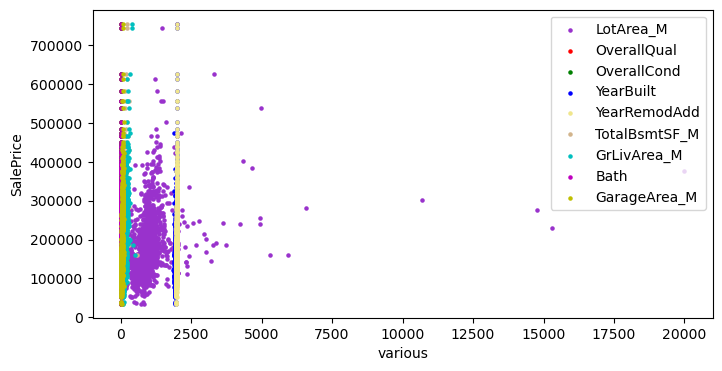

In [113]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
counter = 0
for col in df.corr(numeric_only=True).columns:
    if col == 'SalePrice':
        continue
    #elif col in [
#         'LotArea',
#         'OverallQual',
#         'OverallCond', 
#         'YearBuilt',
#         'YearRemodAdd',
#         'TotalBsmtSF', 
#         'GrLivArea', 
#         'Bath', 
#         'GarageArea'
    #]:
     #   continue          
    tst = df[[col, 'SalePrice']]
    tst = tst.sort_values('SalePrice')
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], c=colors[counter], label=col, s=5)
    counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

4. Сделайте предварительные выводы.

### Ваш вывод здесь ###
1. Больше всего в зависимости от стоимости скачет площадь, lotArea - а скорее, наоборот - на графике это можно проследить, хоть и нужно признать, что "разлет" присутствует немалый.
2. Остальные колонки как будто не двигаются, но на самом деле это из-за выбросов Площади - попробуем отсечь виллы и дворцы:


In [114]:
df2 = df.copy()
df2[df2['LotArea_M'] > 2100] = 2100

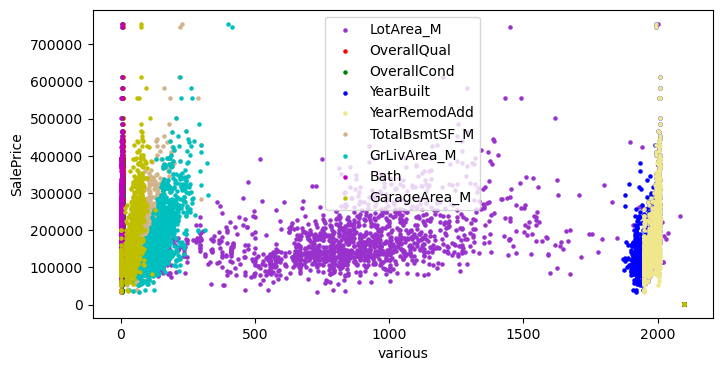

In [115]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
counter = 0
for col in df.corr(numeric_only=True).columns:
    if col == 'SalePrice':
        continue
         
    tst = df2[[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], c=colors[counter], label=col, s=5)
    counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

3. а вот и остальные колонки поползли "вперед" более отчетливо - кроме, пожалуй, ванной комнаты
4. Боюсь ничего неожиданного датасет нам не показал - за большую стоимость мы получаем бОльшую жилплощадь.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

Попробуем проследить как влияет отсутствие ремонта на протяжении времени на стоимость - предположение - цена должна ползти вниз - естественный износ и пр., ведь так?

In [116]:
df['YearsWithoutRemod'] = df['YearRemodAdd'] - df['YearBuilt']

In [117]:
tst2 = df.copy()

tst2.head(3)

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,YearsWithoutRemod
0,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500,0
1,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500,0
2,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500,1


In [118]:
tst2['YearsWithoutRemod'].describe()

count    1460.000000
mean       13.597945
std        24.476465
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       123.000000
Name: YearsWithoutRemod, dtype: float64

## Ваш код здесь ##
тут был код пайплот, но ровно в этот момент коллега посоветовал похожую библиотеку


plt.figure(figsize=(8,4))
plt.scatter( tst2['YearsWithoutRemod'], tst2['SalePrice'], s=5)
plt.xlabel('YearsWithoutRemod')
plt.ylabel('SalePrice')
plt.show()

In [119]:
import plotly.express as px

fig = px.scatter(tst2, x='YearsWithoutRemod', y='SalePrice', )
fig.update_xaxes(title_text='YearsWithoutRemod')
fig.update_yaxes(title_text='SalePrice')

fig.show()

Еще гиппотеза: цены на жилье растут, т.е. чем раньше будет дата продажи от "сегодня" - тем цена должна быть ниже, иными словами численной выражение времени, прошедшего с продаже должно расти, а стоимость одновременно падать. проверимс

In [120]:
# раньше 2000 года продаж не зафиксированно, по этому нет смысла раздувать график, отнимем "двадцатку" и посчитаем, 
# скажем, в месяцах
df['HowMuchTimePassedSinceItWasSold'] = df['DateSold'].apply(lambda x: (23 * 12 + 9) - ((eval(x.split('/')[1])-2000)*12 + 
                                                             eval(x.split('/')[0])))

In [121]:
tst3 = df.copy()
fig = px.box(tst3, x='HowMuchTimePassedSinceItWasSold', y='SalePrice', )
fig.update_xaxes(title_text='HowMuchTimePassedSinceItWasSold')
fig.update_yaxes(title_text='SalePrice')

fig.show()

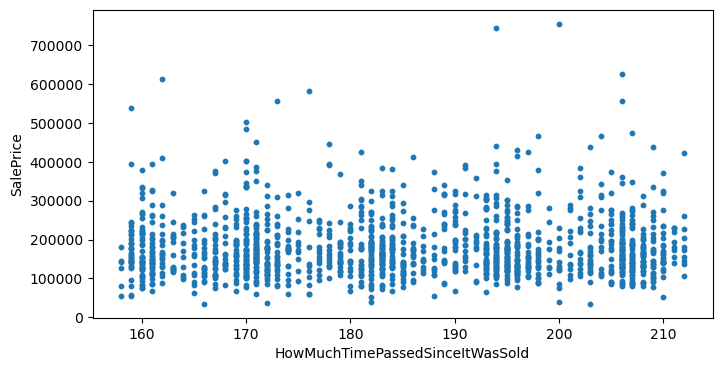

In [122]:
tst3 = df.copy()
tst3 = tst3.sort_values('HowMuchTimePassedSinceItWasSold')
### Ваш код здесь ###
plt.figure(figsize=(8,4))

plt.scatter( tst3['HowMuchTimePassedSinceItWasSold'], tst3['SalePrice'], s=10)


plt.xlabel('HowMuchTimePassedSinceItWasSold')
plt.ylabel('SalePrice')

plt.show()

кажется, зависимости нет:(

попробуем "попроще" - есть ли зависимость между готом продажу и ценой жилья?

In [123]:
df['YearSold'] = df['DateSold'].apply(lambda x:(eval(x.split('/')[1])))
tst4 = df.copy()

In [124]:
fig = px.box(tst4, x='YearSold', y='SalePrice', )
fig.update_xaxes(title_text='YearSold')
fig.update_yaxes(title_text='SalePrice')

fig.show()

медиана даже немного падает - допустим, это волатильность - я бы не стал делать выводы о зависимости и общем падении стоимости недвижимости

Итого, не уверен, нашел ли я что то полезное, но, возможно, колонка с количеством времени без ремонта чем то поможет модели

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [59]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,YearsWithoutRemod,HowMuchTimePassedSinceItWasSold,YearSold
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,158.864130,3,Gd,50.910844,2/2008,Normal,208500,0,187,2008
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,117.243586,2,TA,42.735380,5/2007,Normal,181500,0,196,2007
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,165.924758,3,Gd,56.485024,9/2008,Normal,223500,1,180,2008
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000,55,211,2006
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,204.200794,3,Gd,77.666908,12/2008,Normal,250000,0,177,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,153.011241,3,TA,42.735380,8/2007,Normal,175000,1,193,2007
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,192.587919,2,TA,46.451500,2/2010,Normal,210000,10,163,2010
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,217.393020,2,Gd,23.411556,5/2010,Normal,266500,65,160,2010
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,100.149434,1,Gd,22.296720,4/2010,Normal,142125,46,161,2010


In [125]:
# перевести дату продажи в числовой эквивалент
df['DateSold'] = df['DateSold'].apply(lambda x:(eval(x.split('/')[1])-2000)*12 + 
                                                             eval(x.split('/')[0]))

In [84]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,YearsWithoutRemod,HowMuchTimePassedSinceItWasSold,YearSold
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,158.864130,3,Gd,50.910844,98,Normal,208500,0,187,2008
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,117.243586,2,TA,42.735380,89,Normal,181500,0,196,2007
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,165.924758,3,Gd,56.485024,105,Normal,223500,1,180,2008
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,159.514451,1,Gd,59.643726,74,Abnorml,140000,55,211,2006
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,204.200794,3,Gd,77.666908,108,Normal,250000,0,177,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,153.011241,3,TA,42.735380,92,Normal,175000,1,193,2007
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,192.587919,2,TA,46.451500,122,Normal,210000,10,163,2010
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,217.393020,2,Gd,23.411556,125,Normal,266500,65,160,2010
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,100.149434,1,Gd,22.296720,124,Normal,142125,46,161,2010


In [126]:
df_new = df.copy()

In [127]:
#скалируем

cols_to_scale = []


cols_obj = []
for col in df.columns:
    if df[col].dtype != 'object':
        cols_to_scale.append(col)
        
scaler2 = StandardScaler()

df_scaled = scaler2.fit_transform(df_new[cols_to_scale])
df_scaled2 = df_new.copy()
df_new[cols_to_scale] = pd.DataFrame.from_records(df_scaled, columns=cols_to_scale)
# df_scaled = df_scaled2.copy()

In [128]:
# колонки-объекты

# counter = 0
cols_obj = []
for col in df.columns:
    if df_new[col].dtype == 'object':
        cols_obj.append(col)
#         counter += df[col].value_counts().shape[0]
# counter + len(df.columns)

# df_new = df.copy()

cols_obj = []
for col in df.columns:
    if df_new[col].dtype == 'object':
        cols_obj.append(col)

df_mid = pd.get_dummies(df_new[cols_obj], dtype=int)
df_new = pd.merge(df_new, df_mid, left_index=True, right_index=True)

df_new = df_new.drop(cols_obj, axis=1)

In [129]:

counter = 0
for col in df_new.columns:
    if df_new[df_new[col].isna()].shape[0] > 0:
        counter +=1
        
counter

0

In [130]:
### Ваш код здесь ###

train_df, test_df  = train_test_split(df_new, test_size=0.3, random_state=42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [131]:
### Ваш код здесь ###
# мне подумалось, что кодировать лучше до разделения, т.е. см. п. 1

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [132]:
### Ваш код здесь ###
# мне подумалось, что нормализовать лучше до разделения, т.е. см. п. 1

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [133]:
### Ваш код здесь ###

train_X = train_df.drop('SalePrice', axis=1)
train_y = train_df['SalePrice']

test_X = test_df.drop('SalePrice', axis=1)
test_y = test_df['SalePrice']


model = LinearRegression() 
model.fit(train_X, train_y)



LinearRegression()

In [134]:
print(model.score(train_X, train_y))
print(model.score(test_X, test_y))

0.7997507041329052
0.8383956937156659


In [135]:
preds_train = model.predict(train_X)
preds_test = model.predict(test_X)

train_mae = mean_absolute_error(preds_train, train_y)
test_mae = mean_absolute_error(preds_test, test_y)


train_mse = mean_squared_error(preds_train, train_y)
test_mse = mean_squared_error(preds_test, test_y)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))



print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MSE: 0.19109812914483368
Test MSE: 0.17880574022146004
Train MAE: 0.2510662546103259
Test MAE: 0.2680702972353329


In [136]:
model.coef_
coef = list(model.coef_)
for i in range(len(coef)):
    print(f'w_{i+1}:', coef[i], train_X.columns[i])


w_1: 0.07376202486203443 LotArea_M
w_2: 0.2635213583908125 OverallQual
w_3: 0.06441295642880276 OverallCond
w_4: 122243508941.82433 YearBuilt
w_5: -83560407573.69887 YearRemodAdd
w_6: 0.06273765954744992 TotalBsmtSF_M
w_7: 0.2789032081732847 GrLivArea_M
w_8: 0.0206551218399776 Bath
w_9: 0.0961912484750537 GarageArea_M
w_10: -482898858257.0471 DateSold
w_11: 99066266060.34439 YearsWithoutRemod
w_12: -482898858257.0684 HowMuchTimePassedSinceItWasSold
w_13: -0.022030353546142578 YearSold
w_14: 108907710859.7474 Street_Grvl
w_15: 108907710859.72318 Street_Pave
w_16: -85933901286.90826 BldgType_1Fam
w_17: -85933901287.07697 BldgType_2fmCon
w_18: -85933901287.18323 BldgType_Duplex
w_19: -85933901287.27205 BldgType_Twnhs
w_20: -85933901287.09308 BldgType_TwnhsE
w_21: -65332111542.25209 RoofStyle_Flat
w_22: -65332111542.42047 RoofStyle_Gable
w_23: -65332111542.35496 RoofStyle_Gambrel
w_24: -65332111542.33277 RoofStyle_Hip
w_25: -65332111542.30688 RoofStyle_Mansard
w_26: -65332111542.20567 Roof

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [281]:
### Ваш код здесь ###

l1_model = Lasso(alpha=0.1)
l1_model.fit(train_X, train_y)

l1_score_df = []


# вывод точности предсказания
print('-'*5, 'lambda =', 0.1, '-'*5)
print(l1_model.score(train_X, train_y))
print(l1_model.score(test_X, test_y))

α_list = []
coef = []
for i in range(-4, 5):
    l1_score_current = []
    α = 10**i
    l1_model = Lasso(alpha=α)

    
    l1_model.fit(train_X, train_y)

    coef.append(list(l1_model.coef_))
    α_list.append(α)
    
    preds_train = l1_model.predict(train_X)
    preds_test = l1_model.predict(test_X)

    
    # вывод точности предсказания

    

    train_mae = mean_absolute_error(preds_train, train_y)
    test_mae = mean_absolute_error(preds_test, test_y)
    train_mse = mean_squared_error(preds_train, train_y)
    test_mse = mean_squared_error(preds_test, test_y)
    train_r2 = r2_score(preds_train, train_y)
    test_r2 = r2_score(preds_test, test_y)
    print('-'*5, 'lambda =', α, '-'*5)
    l1_score_current.append(l1_model.score(train_X, train_y))
    print("Train score: ", l1_score_current[-1])
    l1_score_current.append(l1_model.score(test_X, test_y))
    print("Test score: ", l1_score_current[-1])
    l1_score_current.append(train_r2)
    print("Train R2: {}".format(l1_score_current[-1]))
    l1_score_current.append(test_r2)
    print("Test R2: {}".format(l1_score_current[-1]))
    l1_score_current.append(train_mse)
    print("Train MSE: {}".format(l1_score_current[-1]))
    l1_score_current.append(test_mse)
    print("Test MSE: {}".format(l1_score_current[-1]))
    l1_score_current.append(train_mae)
    print("Train MAE: {}".format(l1_score_current[-1]))
    l1_score_current.append(test_mae)
    print("Test MAE: {}".format(l1_score_current[-1]))
    #l1_score_current.append(α)
    l1_score_df.append(l1_score_current)
    
    print(' ')

l1_columns = ['Train score', 'Test score', 'Train R2', 'Test R2', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE']#, 'alpha' ]

----- lambda = 0.1 -----
0.7342266361517649
0.7638295381682786
----- lambda = 0.0001 -----
Train score:  0.7996704874094276
Test score:  0.8390523683378409
Train R2: 0.7491637748060604
Test R2: 0.7714180587117971
Train MSE: 0.19117468005462
Test MSE: 0.17807916804895824
Train MAE: 0.2514404127633574
Test MAE: 0.2675892564003299
 
----- lambda = 0.001 -----
Train score:  0.7979560760337819
Test score:  0.8411225285142168
Train R2: 0.7447800773649764
Test R2: 0.7727493299740613
Train MSE: 0.1928107447661181
Test MSE: 0.17578865654450246
Train MAE: 0.2535791712691662
Test MAE: 0.26570489616000736
 
----- lambda = 0.01 -----
Train score:  0.7892528065729306
Test score:  0.8321398936595912
Train R2: 0.7192381611877285
Test R2: 0.7433626061973747
Train MSE: 0.20111628463935646
Test MSE: 0.1857274181483825
Train MAE: 0.2605043352409468
Test MAE: 0.26825473055936544
 
----- lambda = 0.1 -----
Train score:  0.7342266361517649
Test score:  0.7638295381682786
Train R2: 0.5104729032341622
Test R2:

In [172]:
l1_score_df =  pd.DataFrame.from_records(l1_score_df, columns=l1_columns)

Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [138]:
coef_df = pd.DataFrame.from_records(coef, columns=train_X.columns)

In [139]:
coef_df['α'] = α_list

In [140]:
coef_df

,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,DateSold,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,α
0,0.074704,0.262443,0.063393,0.130871,0.013054,0.061285,0.279463,0.020337,0.096582,0.009247,...,0.0,-0.0,-0.069743,-0.106427,0.027554,0.472338,-0.150812,-0.041526,0.046811,0.0001
1,0.077060,0.262168,0.062711,0.137129,0.010795,0.061287,0.278836,0.018904,0.097587,0.000000,...,0.0,-0.0,-0.075267,-0.048198,0.000000,0.296146,-0.064669,-0.000000,0.083013,0.0010
2,0.073551,0.295028,0.045995,0.147437,0.030948,0.069777,0.290451,0.000000,0.104906,0.000000,...,0.0,-0.0,-0.052208,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.005657,0.0100
3,0.024182,0.373034,0.000000,0.060098,0.032987,0.076629,0.247354,0.000000,0.098492,0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.1000
4,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1.0000
5,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,10.0000
6,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,100.0000
7,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1000.0000
8,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,10000.0000
9,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,100000.0000


<Axes: >

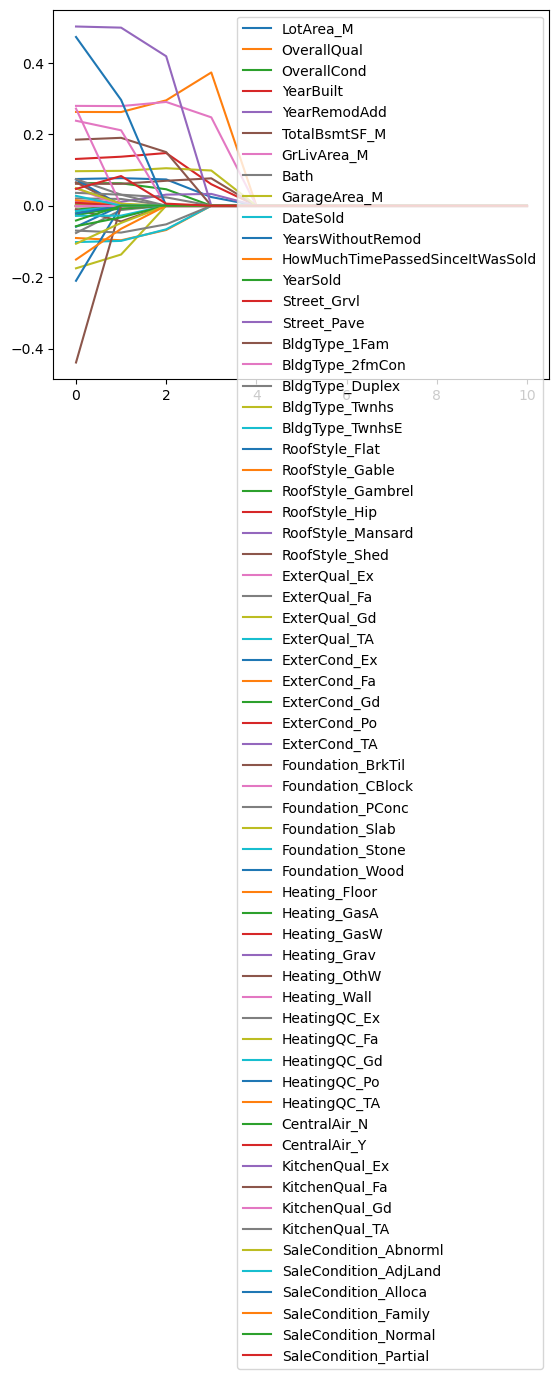

In [141]:
coef_df.drop('α',axis=1).plot()

вывод здесь 
Наилучшие показатели модель дает при "альфе" в 0,001, потом, поправка на альфу, как будто перевешивает всю формулу и модель видит только ее. Я проверил эту теорию без нормализации чисел и действительно, эффект сохранился, но для того, чтобы его наблюдать потребовалось накинуть пару степеней на альфу. 

Вывод хочется сделать, что параметр имеет смысл подбирать в тех же разрядах чисел, в которых в итоге будет пытаться разобраться модель.


3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [192]:
### Ваш код здесь ###
### Ваш код здесь ###

l2_model = Ridge(alpha=0.1)
l2_model.fit(train_X, train_y)

# вывод точности предсказания
# print('-'*5, 'lambda =', 0.1, '-'*5)
# print(l2_model.score(train_X, train_y))
# print(l2_model.score(test_X, test_y))

α_list_l2 = []

l2_score_df = []


coef_l2 = []
for i in range(-4, 7):
    
    l2_score_current = []
    
    α = 10**i
    l2_model = Ridge(alpha=α)

    
    l2_model.fit(train_X, train_y)

    coef_l2.append(list(l2_model.coef_))
    α_list_l2.append(α)

        
    preds_train = l2_model.predict(train_X)
    preds_test = l2_model.predict(test_X)
    
    
    # вывод точности предсказания

    

    train_mae = mean_absolute_error(preds_train, train_y)
    test_mae = mean_absolute_error(preds_test, test_y)
    train_mse = mean_squared_error(preds_train, train_y)
    test_mse = mean_squared_error(preds_test, test_y)
    train_r2 = r2_score(preds_train, train_y)
    test_r2 = r2_score(preds_test, test_y)
    print('-'*5, 'lambda =', α, '-'*5)
    l2_score_current.append(l2_model.score(train_X, train_y))
    print("Train score: ", l2_score_current[-1])
    l2_score_current.append(l2_model.score(test_X, test_y))
    print("Test score: ", l2_score_current[-1])
    l2_score_current.append(train_r2)
    print("Train R2: {}".format(l2_score_current[-1]))
    l2_score_current.append(test_r2)
    print("Test R2: {}".format(l2_score_current[-1]))
    l2_score_current.append(train_mse)
    print("Train MSE: {}".format(l2_score_current[-1]))
    l2_score_current.append(test_mse)
    print("Test MSE: {}".format(l2_score_current[-1]))
    l2_score_current.append(train_mae)
    print("Train MAE: {}".format(l2_score_current[-1]))
    l2_score_current.append(test_mae)
    print("Test MAE: {}".format(l2_score_current[-1]))
    l2_score_current.append(α)
    l2_score_df.append(l2_score_current)
    print(' ')
    
l2_columns = ['Train score', 'Test score', 'Train R2', 'Test R2', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'alpha' ]
l2_score_df =  pd.DataFrame.from_records(l2_score_df, columns=l2_columns)

----- lambda = 0.0001 -----
Train score:  0.7997488036939605
Test score:  0.8383670050701484
Train R2: 0.7496072992605407
Test R2: 0.770893909288151
Train MSE: 0.19109994273586434
Test MSE: 0.17883748253461773
Train MAE: 0.2511040958851333
Test MAE: 0.26811819235767576
 
----- lambda = 0.001 -----
Train score:  0.7997488033884588
Test score:  0.8383686302526574
Train R2: 0.7496065500475961
Test R2: 0.7708958769996861
Train MSE: 0.19109994302740493
Test MSE: 0.1788356843649514
Train MAE: 0.2511041152072204
Test MAE: 0.2681170160392524
 
----- lambda = 0.01 -----
Train score:  0.7997487731137993
Test score:  0.8383848301743609
Train R2: 0.7495990492982005
Test R2: 0.7709154842245735
Train MSE: 0.19109997191854672
Test MSE: 0.17881776009635766
Train MAE: 0.25110429700516357
Test MAE: 0.26810526457316886
 
----- lambda = 0.1 -----
Train score:  0.7997459985993415
Test score:  0.838541783287589
Train R2: 0.749523334036483
Test R2: 0.7711047284579573
Train MSE: 0.19110261964082648
Test MSE: 

<Axes: >

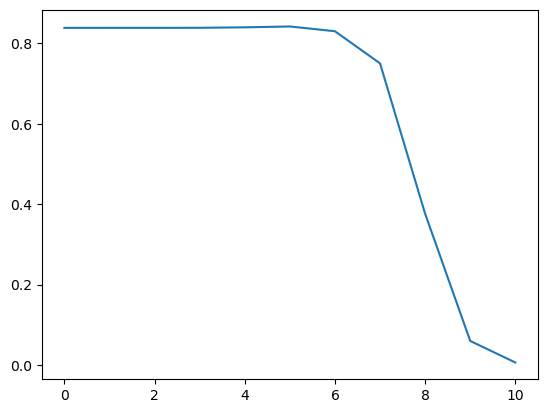

In [190]:
l2_score_df['Test score'].plot()

<Axes: >

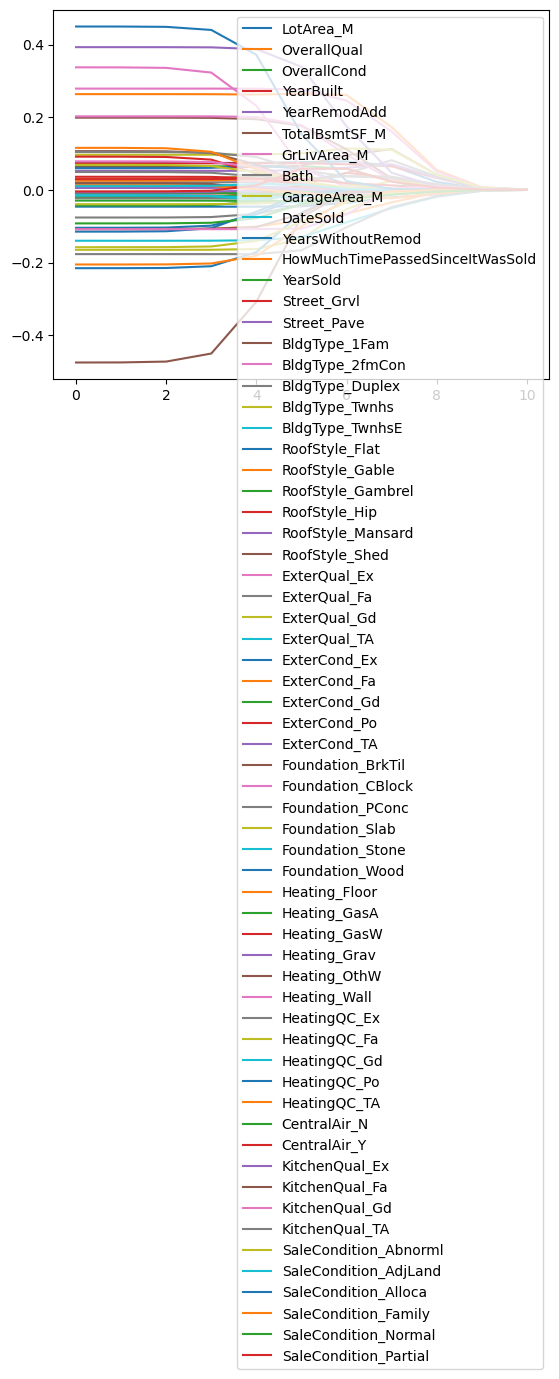

In [195]:

coef_df_l2 = pd.DataFrame.from_records(coef_l2, columns=train_X.columns)
coef_df_l2['α'] = α_list_l2
coef_df_l2.drop('α',axis=1).plot()#

Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [ ]:
### Ваш вывод здесь ###
# наилучшие показатели дает альфа 10 из проверенных вариантов, 
# думаю, за "последнюю" модель имеет смысл взять "последнюю более-менее успешную" модель
       

In [257]:
max_3_vals = coef_df_l2[coef_df_l2.α == 10].values[0][:-1]
max_3_cols = coef_df_l2.drop('α', axis=1).columns
#coef_df_l2[coef_df_l2.α == 10].values[0]
max_3 = list(zip(max_3_vals, max_3_cols))
max_3 = sorted(max_3, reverse=True)[:3]
max_3


[(0.3390270054399742, 'KitchenQual_Ex'),
 (0.2761242759255958, 'GrLivArea_M'),
 (0.26468984845908045, 'OverallQual')]

In [258]:
cols = []
for pos in max_3:
    cols.append(pos[1])
cols.append('SalePrice')
df_new[cols].head(2)

,KitchenQual_Ex,GrLivArea_M,OverallQual,SalePrice
0,0,0.370333,0.651479,0.347273
1,0,-0.482512,-0.071836,0.007288


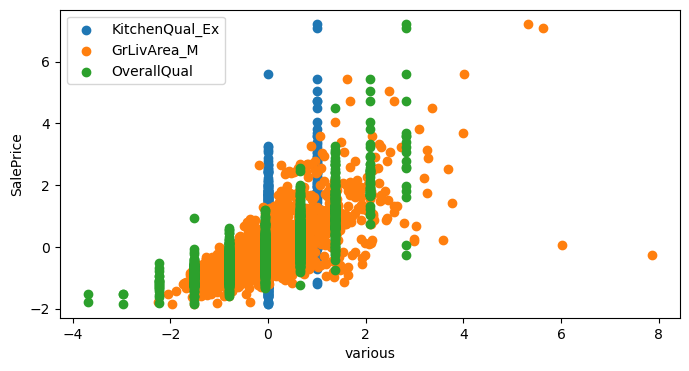

In [259]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
#counter = 0
for col in df_new[cols].columns:
    if col == 'SalePrice':
        continue
         
    tst = df_new[cols][[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], label=col)#, c=colors[counter], s=5)
    #counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

Насчет кухни не уверен, но вообще да, зависимость на лицо, я бы сказал:)

или можно попробовать чуть более приближенно к изначальным значениям, но тут уже "вручную"

In [260]:
cols = []
for pos in max_3:
    cols.append(pos[1])
cols.append('SalePrice')
cols = cols[1:]
cols

['GrLivArea_M', 'OverallQual', 'SalePrice']

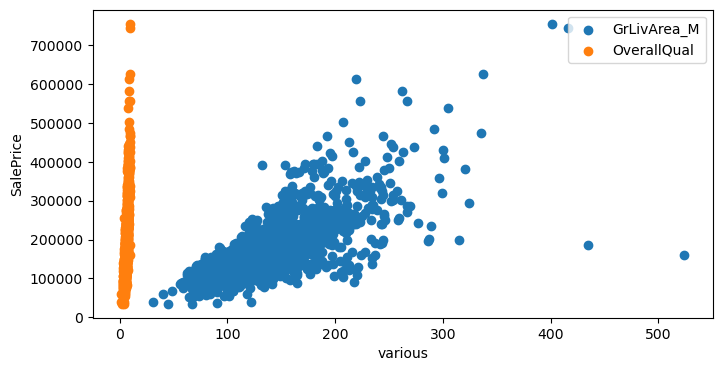

In [261]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
#counter = 0
for col in df[cols].columns:
    if col == 'SalePrice':
        continue
         
    tst = df[cols][[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], label=col)#, c=colors[counter], s=5)
    #counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [262]:
min_3_vals = coef_df_l2[coef_df_l2.α == 10].values[0][:-1]
min_3_cols = coef_df_l2.drop('α', axis=1).columns
#coef_df_l2[coef_df_l2.α == 10].values[0]
min_3 = list(zip(min_3_vals, min_3_cols))
min_3 = sorted(min_3)[:3]
min_3


[(-0.1663617534323988, 'KitchenQual_TA'),
 (-0.13540224032064813, 'BldgType_Twnhs'),
 (-0.13041879616151547, 'ExterQual_TA')]

In [264]:
cols = []
for pos in min_3:
    cols.append(pos[1])
cols.append('SalePrice')
cols

['KitchenQual_TA', 'BldgType_Twnhs', 'ExterQual_TA', 'SalePrice']

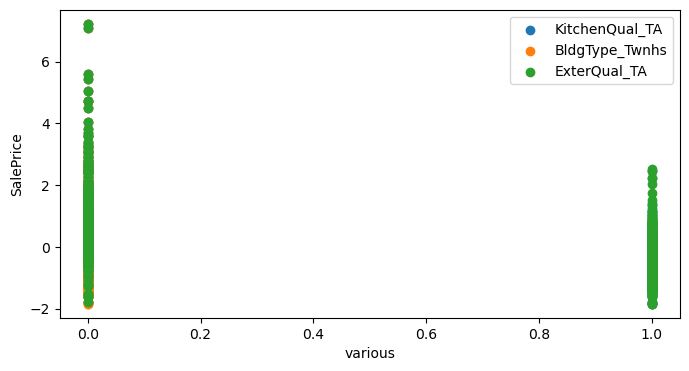

In [265]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
#counter = 0
for col in df_new[cols].columns:
    if col == 'SalePrice':
        continue
         
    tst = df_new[cols][[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], label=col)#, c=colors[counter], s=5)
    #counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

In [266]:
### Ваш вывод здесь ###
# все три признака у меня выдались категориальные, по этому пока сказать не могу - попробуем взять "подходящие"


In [273]:
min_3_vals = coef_df_l2[coef_df_l2.α == 10].values[0][:-1]
min_3_cols = coef_df_l2.drop('α', axis=1).columns
#coef_df_l2[coef_df_l2.α == 10].values[0]
min_3 = list(zip(min_3_vals, min_3_cols))

nums = []
for col in df.columns:
    if df[col].dtype != 'object':
        nums.append(col)
        

min_3 = sorted(min_3)
stand_in = []
for pos in min_3 :
    if pos[1] in nums:
        stand_in.append(pos)
min_3 = stand_in.copy()
min_3 = min_3[:3]
min_3
    

[(-0.04528369790383346, 'YearsWithoutRemod'),
 (-0.007990962136318178, 'YearSold'),
 (-0.004734662348144221, 'HowMuchTimePassedSinceItWasSold')]

In [274]:
cols = []
for pos in min_3:
    cols.append(pos[1])
cols.append('SalePrice')
cols

['YearsWithoutRemod',
 'YearSold',
 'HowMuchTimePassedSinceItWasSold',
 'SalePrice']

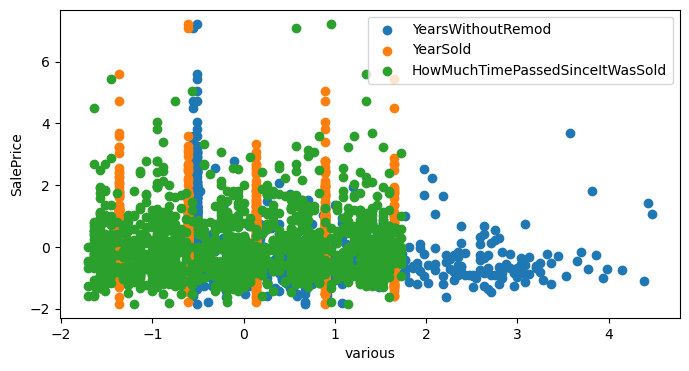

In [280]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
#counter = 0
for col in df_new[cols].columns:
    if col == 'SalePrice':
        continue
         
    tst = df_new[cols][[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], label=col)#, c=colors[counter], s=5)
    #counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

Одна из колонок получилась "не родная", не уверен, насколько ей можно доверять. Но вообще не похоже, что есть какая то зависимость

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [289]:
### Ваш вывод здесь ###
# for pos in coef_df[coef_df['α'] == 0.001].values[0]:
#     print(pos == 0)
    
    
zero_vals = coef_df[coef_df['α'] == 0.001].values[0][:-1]
zero_cols = coef_df.drop('α', axis=1).columns
#coef_df_l2[coef_df_l2.α == 10].values[0]
zero_feats = list(zip(zero_vals, zero_cols))

# nums = []
# for col in df.columns:
#     if df[col].dtype != 'object':
#         nums.append(col)
        

# min_3 = sorted(min_3)
stand_in = []
for pos in zero_feats :
    if pos[0] == 0:
        stand_in.append(pos)
zero_feats = stand_in.copy()
zero_feats = zero_feats[:3]
zero_feats
    

[(0.0, 'DateSold'),
 (-0.0, 'YearsWithoutRemod'),
 (-0.0, 'HowMuchTimePassedSinceItWasSold')]

In [290]:
cols = []
for pos in zero_feats:
    cols.append(pos[1])
cols.append('SalePrice')
cols

['DateSold',
 'YearsWithoutRemod',
 'HowMuchTimePassedSinceItWasSold',
 'SalePrice']

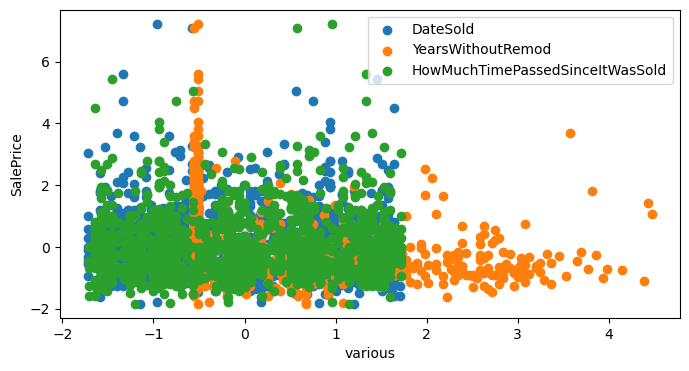

In [291]:
### Ваш код здесь ###
plt.figure(figsize=(8,4))
#counter = 0
for col in df_new[cols].columns:
    if col == 'SalePrice':
        continue
         
    tst = df_new[cols][[col, 'SalePrice']]
    
    tst.reset_index(inplace=True)
    tst = tst.drop('index', axis=1)
    plt.scatter( tst[col], tst['SalePrice'], label=col)#, c=colors[counter], s=5)
    #counter += 1
plt.legend()
plt.xlabel('various')
plt.ylabel('SalePrice')

plt.show()

К сожалению, я не наблюдаю тут какой то зависимости, по крайней мере явной. Возможно по этому модель исключила эти признаки

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 